### *Problem Statement* - The aim here will be to predict the medical costs billed by health insurance on an individual given some features about the individual in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"C:\Users\Ammu\Downloads\insurance.csv")

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Conclusion** : *This is Supervised learning - Regression Task since target variable is continuous*

### Handling Missing values

In [7]:
dataset.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

**Observations** : *In this case we donot have any missing values*

### Handling Outliers

<Axes: >

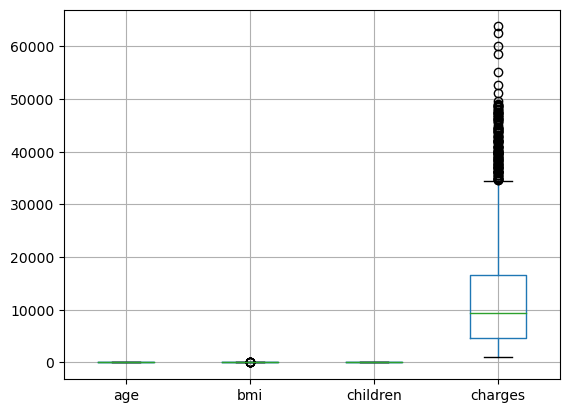

In [8]:
dataset.boxplot()

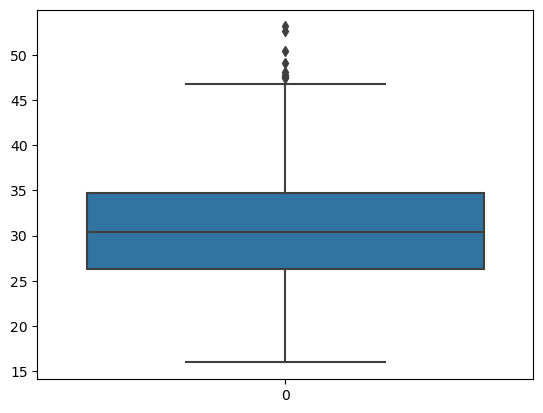

In [9]:
sns.boxplot(dataset['bmi'])
plt.show()

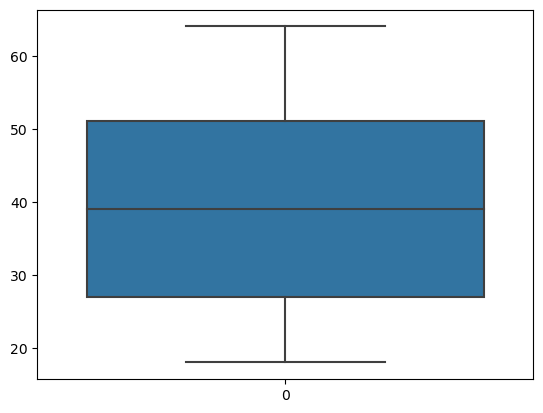

In [10]:
sns.boxplot(dataset['age'])
plt.show()

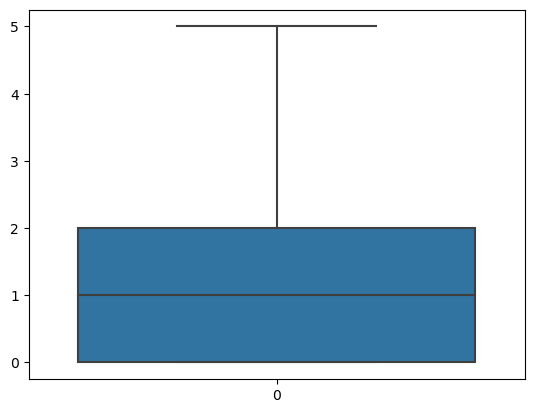

In [11]:
sns.boxplot(dataset['children'])
plt.show()

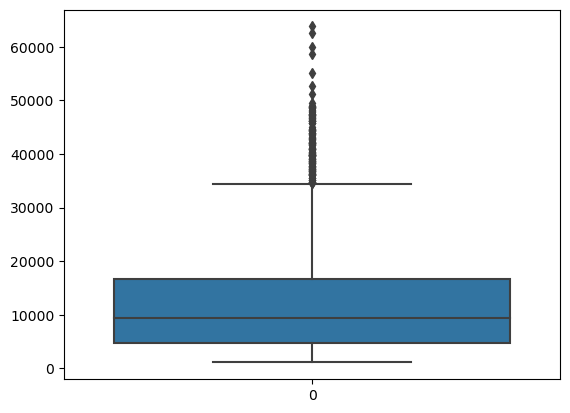

In [12]:
sns.boxplot(dataset['charges'])
plt.show()

**Observations** : *We can see outliers in "BMI" column and "Charges" column*

### Finding outliers

In [13]:
dataset['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [14]:
q1 = dataset['bmi'].quantile(0.25)
q3 = dataset['bmi'].quantile(0.75)

In [15]:
q1

26.29625

In [16]:
q3

34.69375

In [17]:
iqr = q3-q1

In [18]:
iqr

8.3975

In [19]:
lower_boundary = q1 - (1.5*iqr)
upper_boundary = q3 + (1.5*iqr)

In [20]:
upper_boundary

47.290000000000006

In [21]:
#No outliers in lower boundary
dataset[dataset['bmi'] < lower_boundary]

,age,sex,bmi,children,smoker,region,charges


In [22]:
dataset[dataset['bmi'] > upper_boundary]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [23]:
#Taking outliers in one variable
outliers = dataset[(dataset['bmi'] < lower_boundary) | (dataset['bmi'] > upper_boundary)]

In [24]:
outliers

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [25]:
dataset['bmi'].mean()

30.66339686098655

**Conclusion** : *Since outliers are greater in number we cannot drop or modify outliers*

### Removing Unwanted columns

**EDA on continuous variables**

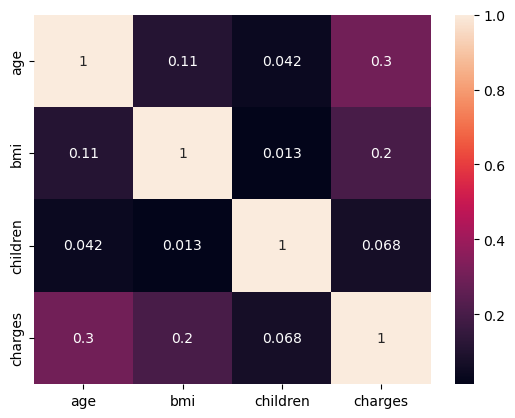

In [26]:
sns.heatmap(dataset[['age','bmi','children','charges']].corr(), annot = True)
plt.show()

**Conclusion** : *Age and charges are having positive correlation*

**EDA on categorical and continuous variables**

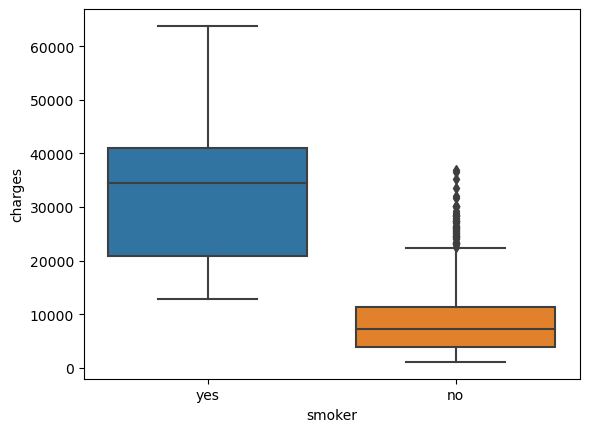

In [27]:
sns.boxplot(x=dataset['smoker'],y=dataset['charges'])
plt.show()

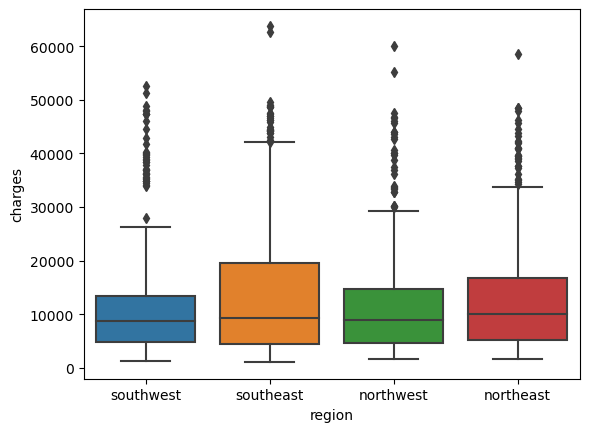

In [28]:
sns.boxplot(x=dataset['region'],y=dataset['charges'])
plt.show()

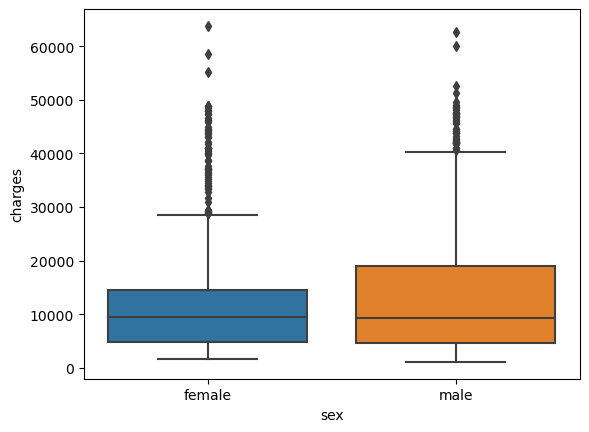

In [29]:
sns.boxplot(x=dataset['sex'],y=dataset['charges'])
plt.show()

**Observation** : *No need to drop any columns since we can see relationship between columns*

### Removing Garbage

In [30]:
for each_col in dataset:
    if dataset[each_col].dtype == 'object' and dataset[each_col].nunique() < 50:
        print(each_col,":",dataset[each_col].unique())

sex : ['female' 'male']
smoker : ['yes' 'no']
region : ['southwest' 'southeast' 'northwest' 'northeast']


**Observation** : *No need to remove garbage values since we donot have any special characters*

### Encoding Categorical text data

In [31]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Conclusion** : The categorical columns are in Nominal data, hence we use *ONE HOT ENCODING*

### *ONE HOT ENCONDING*

In [32]:
#PANDAS
pd.get_dummies(dataset, columns = ['sex','smoker','region'])

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [33]:
#Sklearn
from sklearn.compose import ColumnTransformer

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
oh = OneHotEncoder()

In [36]:
ct = ColumnTransformer(transformers = [("ohe", oh, ["sex","smoker","region"] )], remainder = "passthrough")

In [37]:
ct.fit_transform(dataset)

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.79000000e+01, 0.00000000e+00, 1.68849240e+04],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.37700000e+01, 1.00000000e+00, 1.72555230e+03],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.30000000e+01, 3.00000000e+00, 4.44946200e+03],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        3.68500000e+01, 0.00000000e+00, 1.62983350e+03],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.58000000e+01, 0.00000000e+00, 2.00794500e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.90700000e+01, 0.00000000e+00, 2.91413603e+04]])

In [38]:
ct.get_feature_names_out()

array(['ohe__sex_female', 'ohe__sex_male', 'ohe__smoker_no',
       'ohe__smoker_yes', 'ohe__region_northeast',
       'ohe__region_northwest', 'ohe__region_southeast',
       'ohe__region_southwest', 'remainder__age', 'remainder__bmi',
       'remainder__children', 'remainder__charges'], dtype=object)

In [39]:
dataset = ct.fit_transform(dataset)

In [40]:
col_name = [each_col.split("__")[1] for each_col in ct.get_feature_names_out()]

In [41]:
pd.DataFrame(dataset, columns = col_name)

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,50.0,30.970,3.0,10600.54830
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.0,31.920,0.0,2205.98080
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,36.850,0.0,1629.83350
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.0,25.800,0.0,2007.94500


In [42]:
dataset = pd.DataFrame(dataset, columns = col_name)

In [43]:
dataset.dtypes

sex_female          float64
sex_male            float64
smoker_no           float64
smoker_yes          float64
region_northeast    float64
region_northwest    float64
region_southeast    float64
region_southwest    float64
age                 float64
bmi                 float64
children            float64
charges             float64
dtype: object

### Split Independent and dependent variables

In [45]:
#Independent variables / Inputs
X = dataset.drop('charges', axis=1)

In [46]:
X

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,50.0,30.970,3.0
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.0,31.920,0.0
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,36.850,0.0
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.0,25.800,0.0


In [47]:
#Dependent variable/ Output /Target
y = dataset['charges']

### Split data into test and train

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [51]:
X_train

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
384,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,44.0,22.135,2.0
650,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49.0,42.680,2.0
703,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,34.0,26.410,1.0
206,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,59.0,26.400,0.0
1081,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,27.835,1.0
...,...,...,...,...,...,...,...,...,...,...,...
253,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,27.0,30.300,3.0
613,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,34.0,19.000,3.0
566,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,38.0,40.565,1.0
1065,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,42.0,25.300,1.0


In [53]:
X_test.shape

(335, 11)

In [56]:
y_train

384      8302.53565
650      9800.88820
703      5385.33790
206     11743.29900
1081     4454.40265
           ...     
253      4260.74400
613      6753.03800
566      6373.55735
1065     7045.49900
732      4234.92700
Name: charges, Length: 1003, dtype: float64

### Scaling data

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc = StandardScaler()

In [59]:
X_train = sc.fit_transform(X_train)

In [61]:
X_train

array([[-0.99701343,  0.99701343,  0.50529115, ...,  0.36669862,
        -1.40074562,  0.75553369],
       [ 1.00299551, -1.00299551,  0.50529115, ...,  0.72385411,
         1.92111045,  0.75553369],
       [ 1.00299551, -1.00299551,  0.50529115, ..., -0.34761235,
        -0.70953439, -0.07904813],
       ...,
       [ 1.00299551, -1.00299551,  0.50529115, ..., -0.06188796,
         1.57914279, -0.07904813],
       [ 1.00299551, -1.00299551,  0.50529115, ...,  0.22383643,
        -0.88900678, -0.07904813],
       [ 1.00299551, -1.00299551,  0.50529115, ..., -1.06192332,
        -0.11290996,  1.59011551]])

In [62]:
X_test = sc.transform(X_test)

In [63]:
X_test

array([[-0.99701343,  0.99701343,  0.50529115, ..., -0.63333674,
        -0.50985115, -0.07904813],
       [ 1.00299551, -1.00299551,  0.50529115, ..., -1.27621661,
        -2.1663328 , -0.07904813],
       [ 1.00299551, -1.00299551,  0.50529115, ...,  1.29530289,
        -1.72977834, -0.07904813],
       ...,
       [-0.99701343,  0.99701343, -1.97905701, ..., -1.4905099 ,
         0.15063958, -0.91362995],
       [-0.99701343,  0.99701343,  0.50529115, ..., -1.41907881,
        -1.64650962,  0.75553369],
       [-0.99701343,  0.99701343, -1.97905701, ...,  1.0810096 ,
        -0.92134415,  1.59011551]])

### Building ML Model

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lr = LinearRegression()

In [66]:
lr.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = lr.predict(X_test)

In [69]:
from sklearn import metrics

In [70]:
metrics.mean_absolute_error(y_test, y_pred)

4258.746205491293

In [71]:
output_df = pd.DataFrame({'Actual': y_test})

In [72]:
output_df['Linear Regression Predictions'] = y_pred

In [76]:
output_df

,Actual,Linear Regression Predictions
282,4237.12655,5275.835141
680,2585.26900,-1252.164859
927,12032.32600,8891.835141
461,22144.03200,31339.835141
1182,2632.99200,3531.835141
...,...,...
242,35160.13457,10619.835141
226,2689.49540,7051.835141
911,33732.68670,26811.835141
276,2803.69785,219.835141


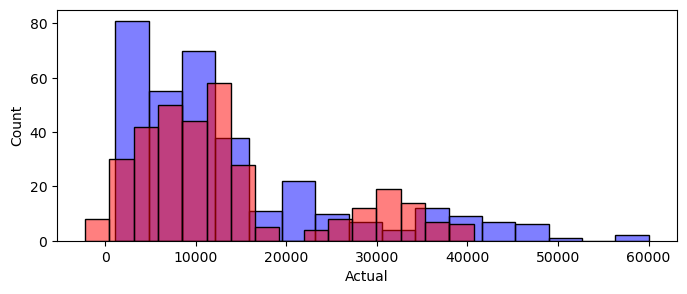

In [75]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Linear Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.show()